170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 114ms/step - accuracy: 0.3177 - loss: 1.8280
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.5366 - loss: 1.2966
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 96ms/step - accuracy: 0.6074 - loss: 1.1181
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 94ms/step - accuracy: 0.6473 - loss: 1.0086
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 94ms/step - accuracy: 0.6817 - loss: 0.9096
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 93ms/step - accuracy: 0.7019 - loss: 0.8483
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 99ms/step - accuracy: 0.7232 - loss: 0.7893
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 95ms/step - accuracy: 0.7345 - loss: 0.7487
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 94ms/step - accuracy: 0.7470 - loss: 0.7145
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 93ms/step - accuracy: 0.7649 - loss: 0.6802
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7051 - loss: 0.8467
Test accuracy: 0.70169997215271


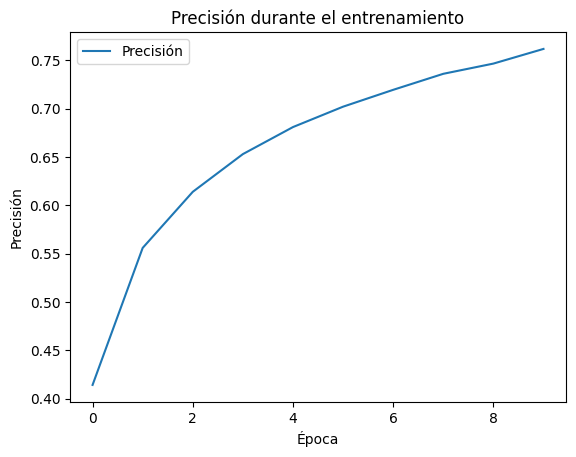

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


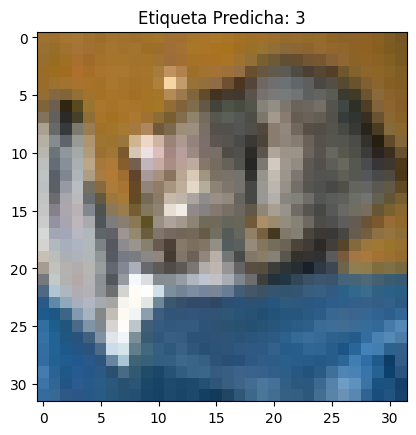

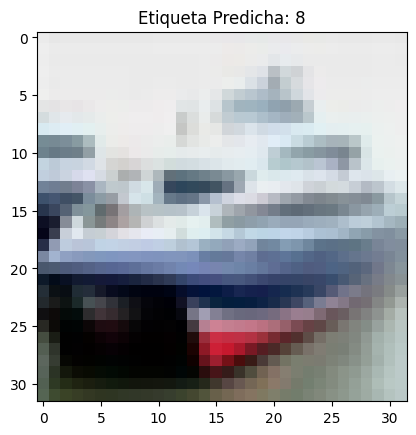

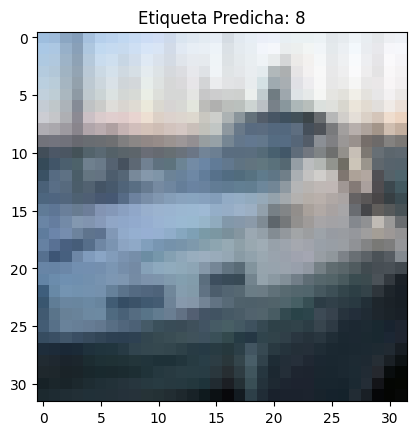

'\nObservaciones:\n1. La arquitectura utilizada es básica y permite resultados aceptables para el dataset CIFAR-10 (70% de precisión).\n2. El modelo podría mejorar con más capas, técnicas de aumento de datos o redes preentrenadas como ResNet.\n3. La visualización de las predicciones permite observar cómo el modelo clasifica las imágenes en las categorías correctas.\n4. Con un entrenamiento más extenso o ajustes en los hiperparámetros, el rendimiento podría mejorar significativamente.\n'

In [1]:
"""
Este código entrena una CNN para clasificar imágenes del dataset CIFAR-10, que contiene 10 categorías como aviones, automóviles y animales.
La red neuronal usa tres capas convolucionales, max-pooling, y una capa densa para predecir la clase de cada imagen.
El modelo es entrenado con un conjunto de datos de 50,000 imágenes para entrenamiento y 10,000 para prueba.
"""

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Cargar el dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocesar los datos
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Construir el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10, batch_size=64)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Graficar precisión del entrenamiento
plt.plot(history.history['accuracy'], label='Precisión')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Predecir y mostrar tres imágenes de prueba
predictions = model.predict(test_images)
for i in range(3):
    plt.imshow(test_images[i])
    plt.title(f'Etiqueta Predicha: {np.argmax(predictions[i])}')
    plt.show()

"""
Observaciones:
1. La arquitectura utilizada es básica y permite resultados aceptables para el dataset CIFAR-10 (70% de precisión).
2. El modelo podría mejorar con más capas, técnicas de aumento de datos o redes preentrenadas como ResNet.
3. La visualización de las predicciones permite observar cómo el modelo clasifica las imágenes en las categorías correctas.
4. Con un entrenamiento más extenso o ajustes en los hiperparámetros, el rendimiento podría mejorar significativamente.
"""
